In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("husl")
#Home work starts - you need to understand these libraries - overview
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
vairam = pd.read_csv(r"DiamondsPrices.csv")

In [3]:
vairam.shape

(53940, 10)

In [4]:
vairam.info

<bound method DataFrame.info of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [5]:
vairam.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
vairam.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
vairam = vairam.drop(vairam[vairam["x"]==0].index)
vairam = vairam.drop(vairam[vairam["y"]==0].index)
vairam = vairam.drop(vairam[vairam["z"]==0].index)
vairam.shape

(53920, 10)

In [8]:
s = (vairam.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [10]:
label_data = vairam.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [11]:
vairam.price.std()

3987.280445975307

In [12]:
vairam.price.mean()

3930.993230712166

In [13]:
upperlimit=label_data.price.mean() + 3* label_data.price.std() 
lowerlimit=label_data.price.mean() - 3* label_data.price.std() 
print("up:",upperlimit)
print("ll:",lowerlimit)

up: 15892.834568638089
ll: -8030.848107213756


In [14]:
label_data.loc[(label_data.price > upperlimit) | (label_data.price < lowerlimit)]

,carat,cut,color,clarity,depth,table,price,x,y,z
26390,2.05,3,5,5,62.5,59.0,15897,8.07,8.12,5.06
26391,2.00,3,3,3,62.1,59.0,15897,8.12,8.02,5.01
26392,2.20,3,3,3,60.4,60.0,15897,8.44,8.36,5.08
26393,2.03,1,6,7,63.2,60.0,15898,7.88,7.94,5.00
26394,2.19,4,5,3,60.3,60.0,15907,8.29,8.33,5.01
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,4,4,2,62.8,57.0,18803,7.95,8.00,5.01
27746,2.07,2,3,3,62.5,55.0,18804,8.20,8.13,5.11
27747,1.51,2,3,1,61.7,55.0,18806,7.37,7.41,4.56
27748,2.00,4,3,2,63.5,56.0,18818,7.90,7.97,5.04


In [15]:
new_label_data=label_data.loc[(label_data.price < upperlimit) & (label_data.price > lowerlimit)]
print("before removing ouliers:",len(label_data))
print("after removing ouliers:",len(new_label_data))
print("outliers:",len(label_data)-len(new_label_data))

before removing ouliers: 53920
after removing ouliers: 52714
outliers: 1206


<Axes: >

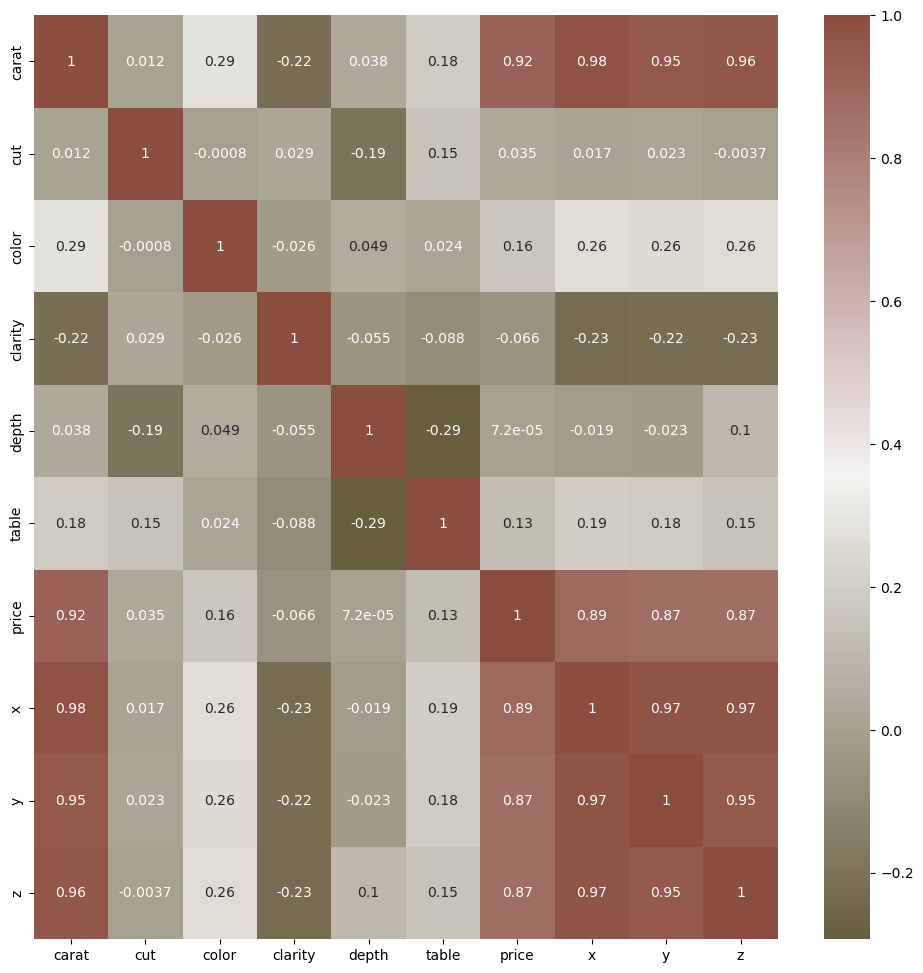

In [16]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= new_label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [17]:
X= new_label_data.drop(["price"],axis =1)
y= new_label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [18]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [19]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for carat is 9976.028219625367
The coefficient for cut is 65.33313773526538
The coefficient for color is -236.29557043292772
The coefficient for clarity is 276.8718239183761
The coefficient for depth is -121.47933132608811
The coefficient for table is -81.09454031357888
The coefficient for x is -908.329203930406
The coefficient for y is 42.802165721393635
The coefficient for z is -31.679139504872353


In [20]:
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 12508.205429526846


In [21]:
regression_model.score(X_train, y_train)

0.8805485872161571

In [22]:
regression_model.score(X_test, y_test)

0.8829124418308194

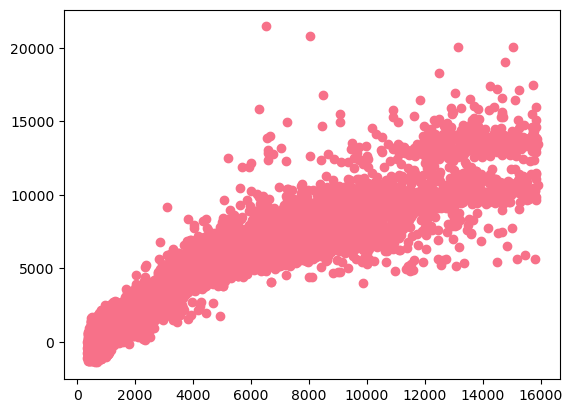

In [23]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test, y_pred)